In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
data=pd.read_csv("Finance data.txt")
data

,TransactionID,TransactionAmount,MerchantID,CustomerID,TransactionDate,IsFraud
0,1,100.0,MerchantA,CustomerX,2023-01-01 08:00:00,0
1,2,25.0,MerchantB,CustomerY,2023-01-01 08:30:00,0
2,3,300.0,MerchantA,CustomerZ,2023-01-01 09:00:00,1
3,4,50.0,MerchantC,CustomerX,2023-01-01 10:00:00,0
4,5,75.0,MerchantB,CustomerY,2023-01-01 11:00:00,0
5,6,200.0,MerchantA,CustomerZ,2023-01-01 11:30:00,0
6,7,600.0,MerchantD,CustomerX,2023-01-01 12:00:00,1
7,8,40.0,MerchantB,CustomerY,2023-01-01 13:00:00,0
8,9,150.0,MerchantE,CustomerZ,2023-01-01 14:00:00,0
9,10,35.0,MerchantF,CustomerX,2023-01-01 15:00:00,0


In [89]:
print(data.head())
print(data.info())

   TransactionID  TransactionAmount MerchantID CustomerID  \
0              1              100.0  MerchantA  CustomerX   
1              2               25.0  MerchantB  CustomerY   
2              3              300.0  MerchantA  CustomerZ   
3              4               50.0  MerchantC  CustomerX   
4              5               75.0  MerchantB  CustomerY   

       TransactionDate  IsFraud  
0  2023-01-01 08:00:00        0  
1  2023-01-01 08:30:00        0  
2  2023-01-01 09:00:00        1  
3  2023-01-01 10:00:00        0  
4  2023-01-01 11:00:00        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      10 non-null     int64  
 1   TransactionAmount  10 non-null     float64
 2   MerchantID         10 non-null     object 
 3   CustomerID         10 non-null     object 
 4   TransactionDate    10 non-null     

In [60]:
class_distribution = data['TransactionAmount'].value_counts()
print(class_distribution)


100.0    1
25.0     1
300.0    1
50.0     1
75.0     1
200.0    1
600.0    1
40.0     1
150.0    1
35.0     1
Name: TransactionAmount, dtype: int64


In [91]:
data = pd.get_dummies(data, columns=['MerchantID', 'CustomerID'], drop_first=True)


In [92]:
# Convert 'TransactionDate' to a datetime object
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

# Extract relevant features from the datetime
data['Year'] = data['TransactionDate'].dt.year
data['Month'] = data['TransactionDate'].dt.month
data['Day'] = data['TransactionDate'].dt.day
data['Hour'] = data['TransactionDate'].dt.hour
data['Minute'] = data['TransactionDate'].dt.minute
data['Second'] = data['TransactionDate'].dt.second

# Drop the original 'TransactionDate' column
data = data.drop(columns=['TransactionDate'])


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'X' contains your feature columns, and 'y' contains the labels
X = data.drop(columns=['TransactionAmount'])
y = data['TransactionID']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score with 'macro' average
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


C:\Users\thama\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thama\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F1-score: 0.00


C:\Users\thama\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thama\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load your dataset
data = pd.read_csv("Finance data.txt")

# Creating New Features
data['TransactionFrequency'] = data.groupby('CustomerID')['TransactionID'].transform('count')
data['DayOfWeek'] = pd.to_datetime(data['TransactionDate']).dt.dayofweek
data['HourOfDay'] = pd.to_datetime(data['TransactionDate']).dt.hour

# Scaling or Normalizing Features
scaler = StandardScaler()
data['TransactionAmount'] = scaler.fit_transform(data['TransactionAmount'].values.reshape(-1, 1))

# Encoding Categorical Variables
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(data[['MerchantID', 'CustomerID']])
encoded_feature_names = encoder.get_feature_names_out(['MerchantID', 'CustomerID'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)
data = pd.concat([data, encoded_df], axis=1)

# Dropping original categorical columns
data = data.drop(columns=['MerchantID', 'CustomerID'])

# Now, you can use the preprocessed dataset to build and train your fraud detection model.


C:\Users\thama\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train a logistic regression model on the resampled data
model = LogisticRegression()
model.fit(X_resampled, y_resampled)


In [67]:
df=data.fillna(method='bfill')



array([[<Axes: title={'center': 'TransactionID'}>,
        <Axes: title={'center': 'TransactionAmount'}>,
        <Axes: title={'center': 'IsFraud'}>,
        <Axes: title={'center': 'MerchantID_MerchantB'}>],
       [<Axes: title={'center': 'MerchantID_MerchantC'}>,
        <Axes: title={'center': 'MerchantID_MerchantD'}>,
        <Axes: title={'center': 'MerchantID_MerchantE'}>,
        <Axes: title={'center': 'MerchantID_MerchantF'}>],
       [<Axes: title={'center': 'CustomerID_CustomerY'}>,
        <Axes: title={'center': 'CustomerID_CustomerZ'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Minute'}>,
        <Axes: title={'center': 'Second'}>]], dtype=object)

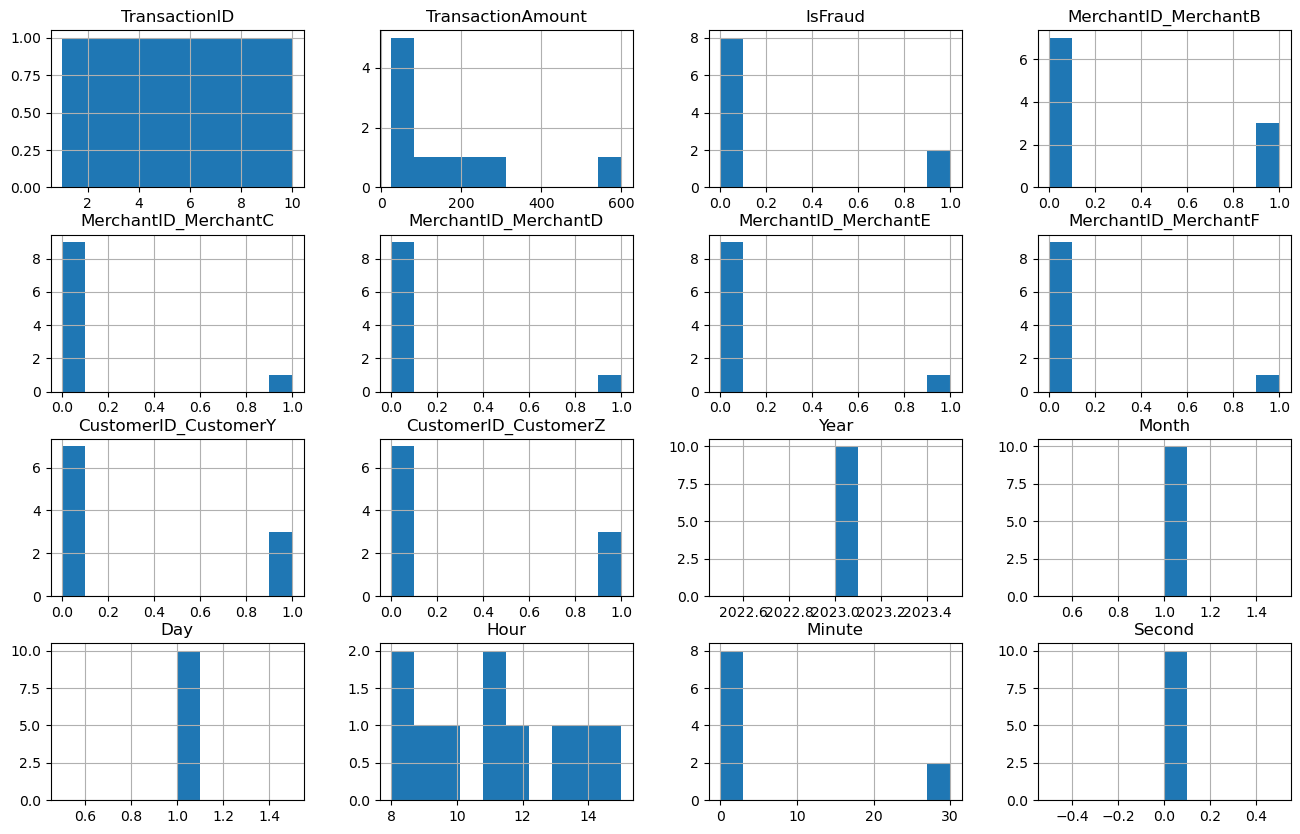

In [68]:
df.hist(figsize=(16,10))

<Axes: >

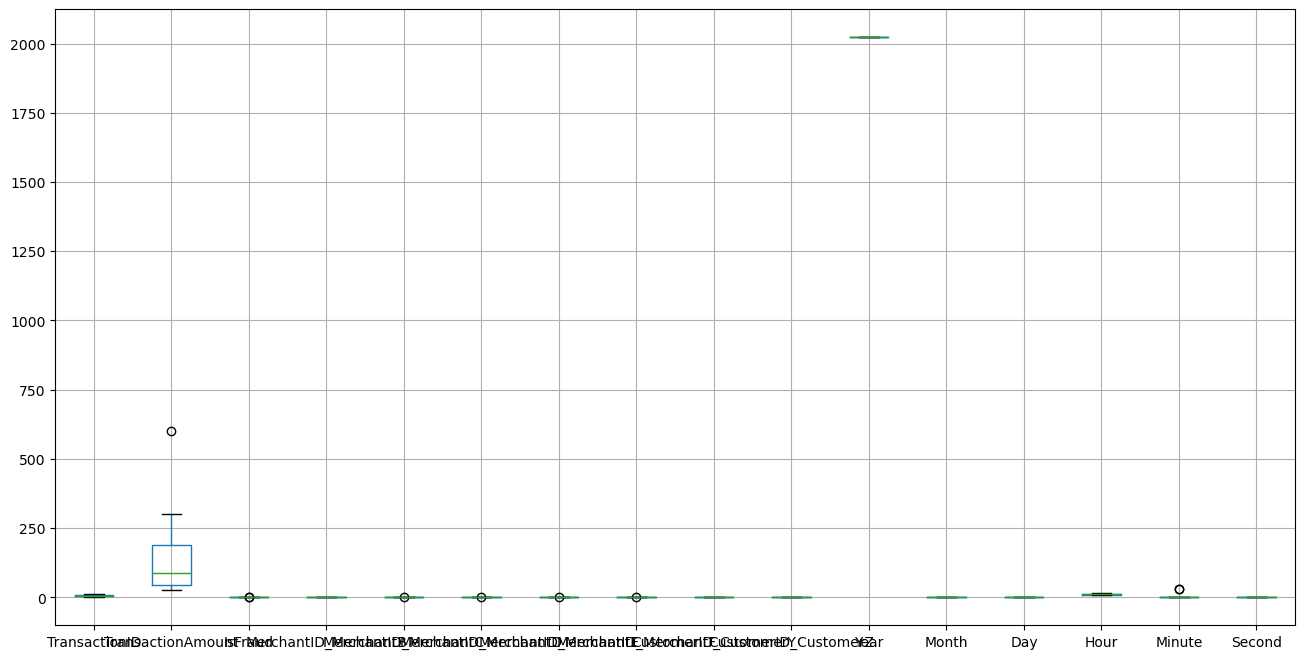

In [69]:
df.boxplot(figsize=(16,8))

<Axes: >

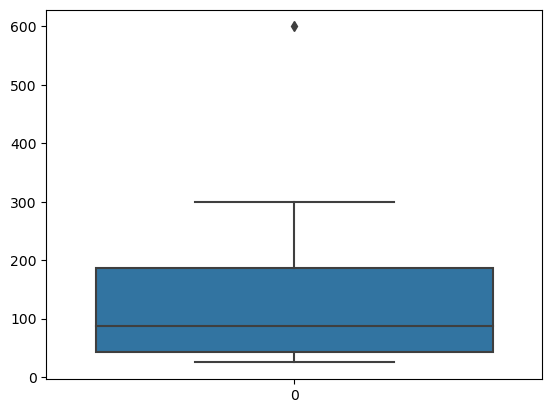

In [70]:
sns.boxplot(df['TransactionAmount'])

C:\Users\thama\AppData\Local\Temp\ipykernel_65480\812363639.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TransactionID'])


<Axes: xlabel='TransactionID', ylabel='Density'>

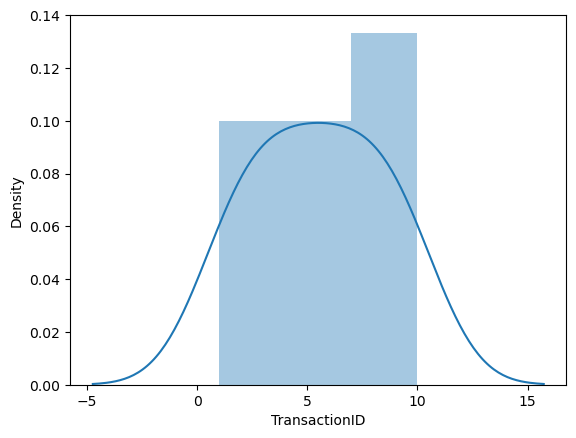

In [71]:
sns.distplot(df['TransactionID'])

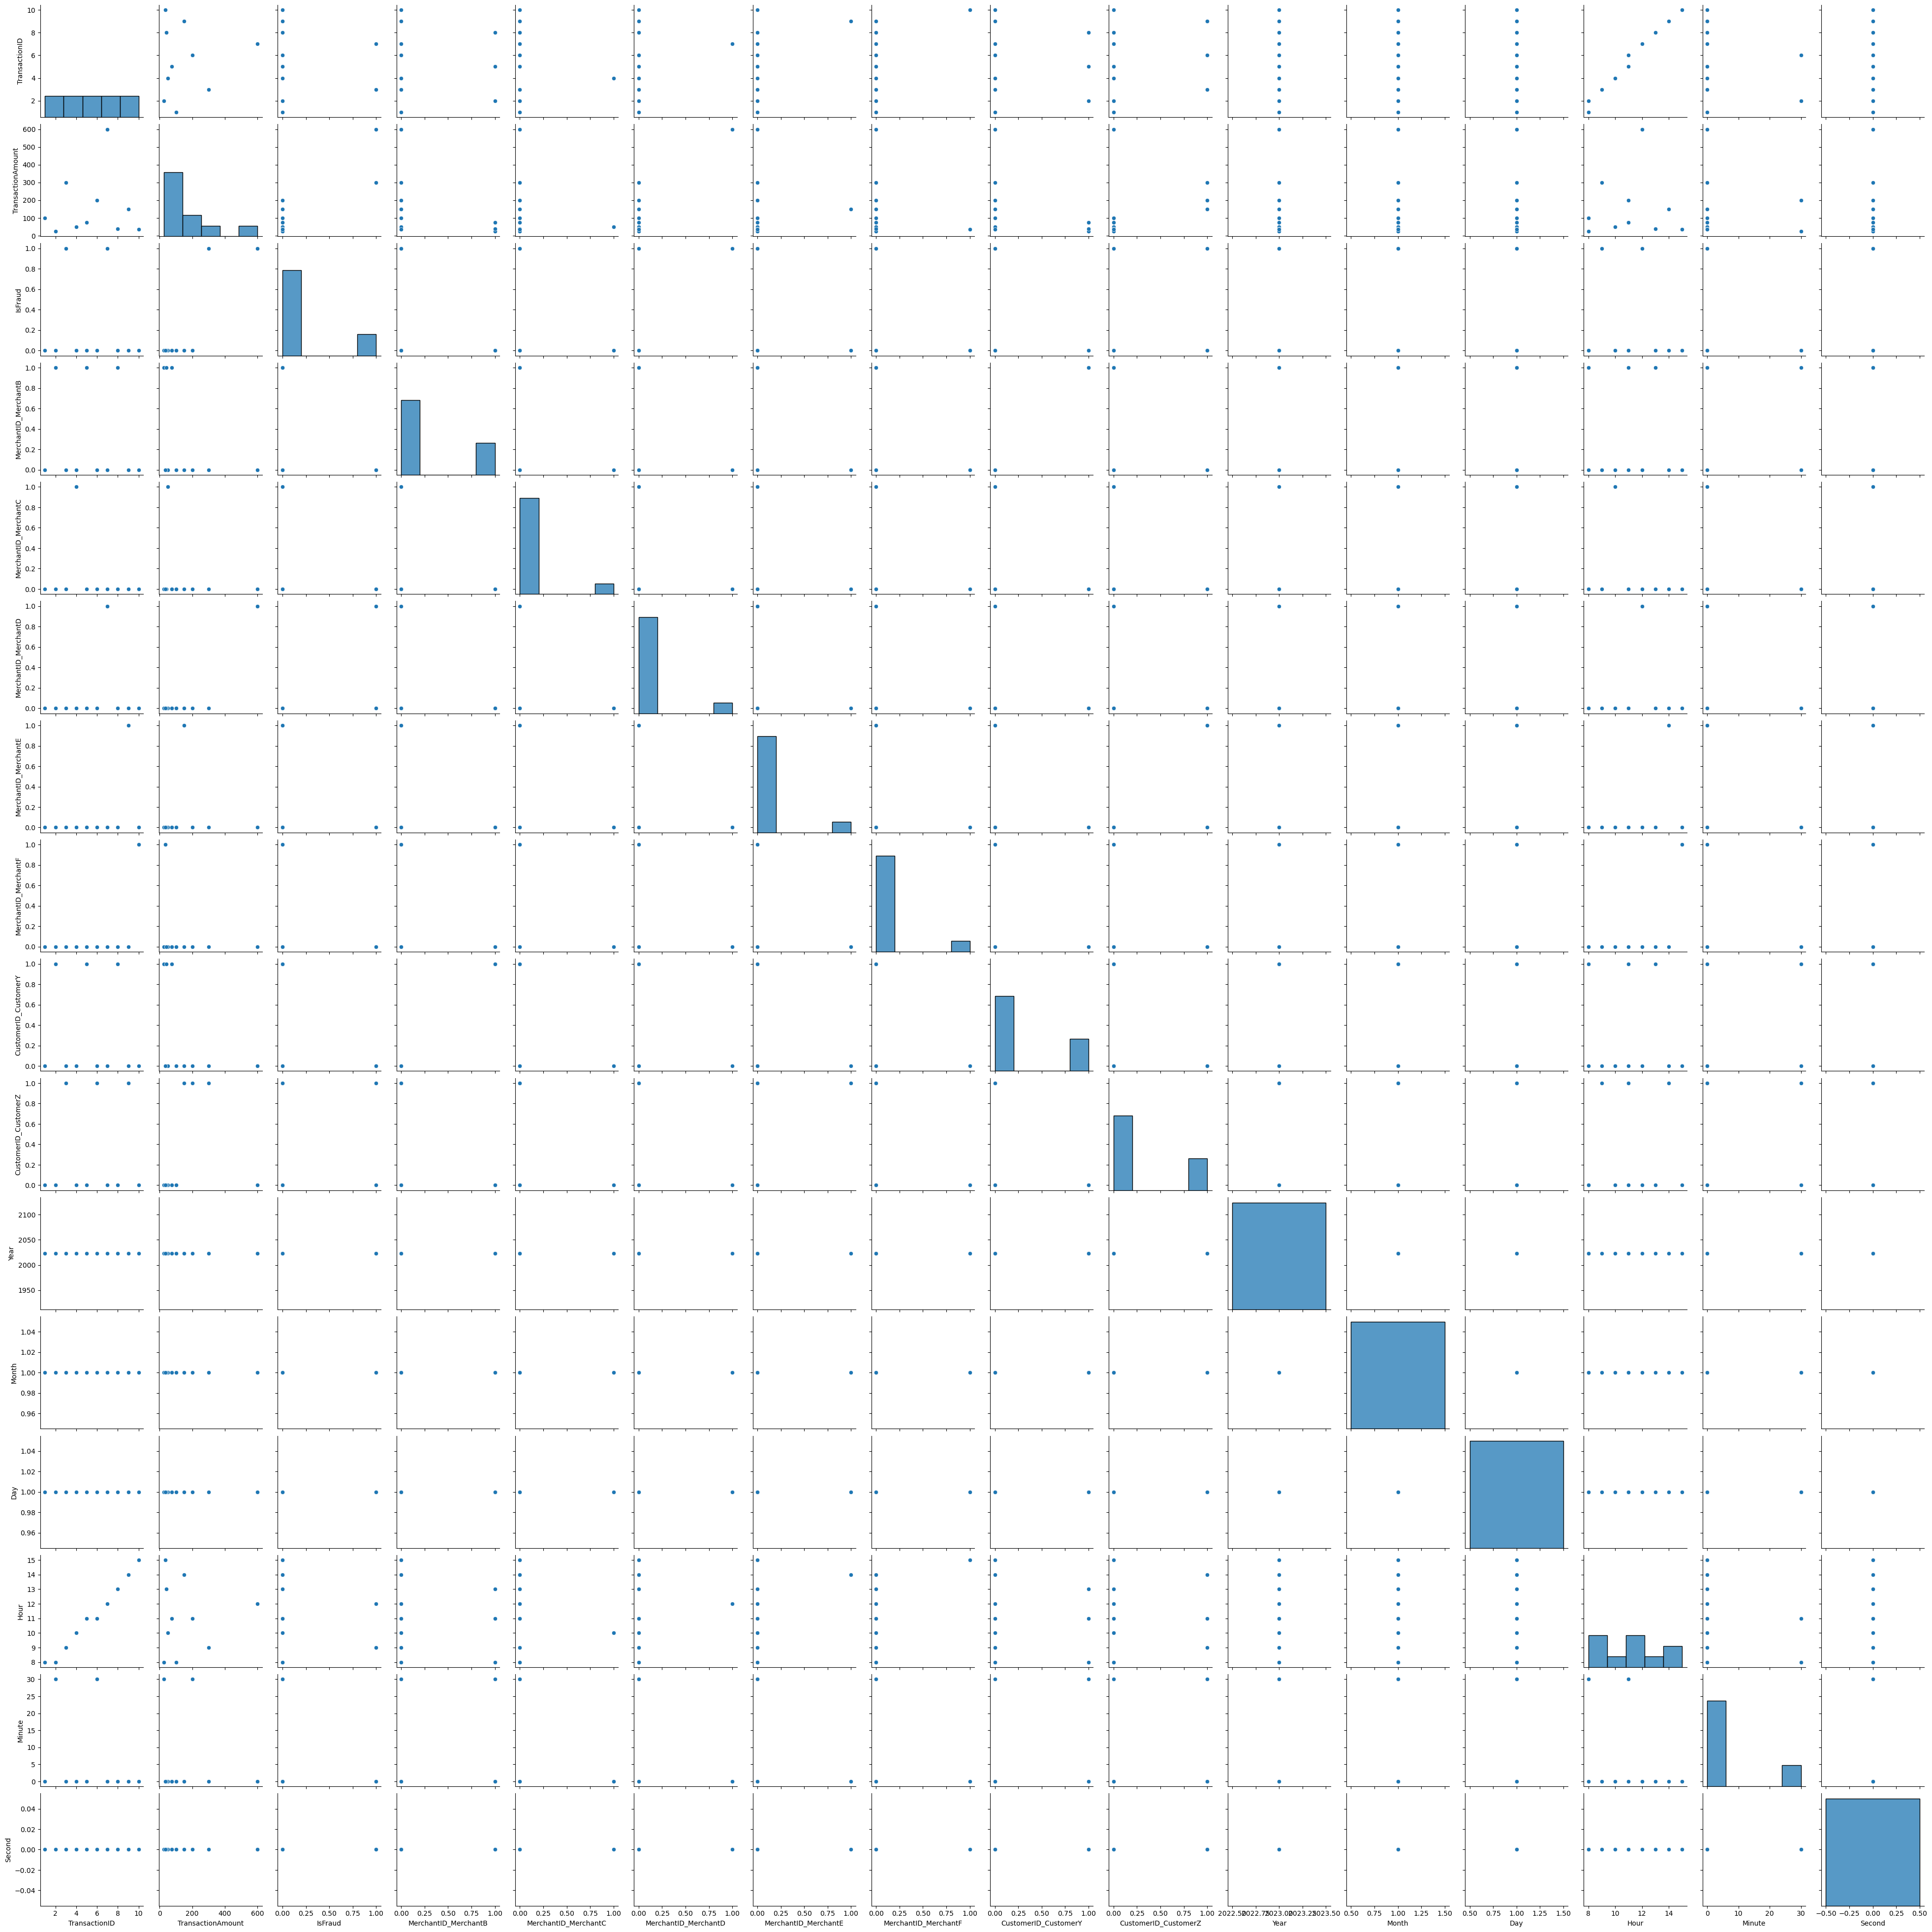

In [72]:
sns.pairplot(df)

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("*******Performance Measures for Logistic Regression***********")
print('Accuracy Score:\t\n', accuracy_score (y_test,y_pred))
print()
print('='*80)
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print()
print('='*80) 
print('Classification Report: \n',classification_report(y_test,y_pred))
print('='*80)

*******Performance Measures for Logistic Regression***********
Accuracy Score:	
 0.0

Confusion Matrix: 
 [[0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 1 0]]

Classification Report: 
               precision    recall  f1-score   support

           2       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\Users\thama\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thama\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thama\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thama\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [81]:
df['IsFraud'].value_counts

<bound method IndexOpsMixin.value_counts of 0    0
1    0
2    1
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: IsFraud, dtype: int64>

In [95]:
log_reg=LogisticRegression (solver='liblinear', verbose=2)

#Train the model

print('Training the model\n')

log_reg.fit(X_train, y_train)

#Test the model

y_pred=log_reg.predict(X_test)

print('Predicted Label for the input samples: \n',)

print()

print('Testing is completed\n')

print('Testing samples are: \t',len(y_pred))

Training the model

[LibLinear]Predicted Label for the input samples: 


Testing is completed

Testing samples are: 	 2


In [96]:
log_reg.classes_

array([ 1,  3,  4,  5,  6,  7,  8, 10], dtype=int64)

In [97]:
y_probs=log_reg.predict_proba(X_test)[:,1]
y_probs

array([0.16241281, 0.04363456])

In [103]:
from sklearn.preprocessing import LabelBinarizer

# Assuming 'y' contains your multiclass labels (e.g., [2, 9, ...])
lb = LabelBinarizer()
y_binary = lb.fit_transform(y)

# Now 'y_binary' contains binary labels (0 or 1) for the specified class


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

#Calculate ROC & AUC

fpr, tpr, thresholds=roc_curve(y_test,y_probs) 
roc_curve=auc(fpr, tpr)

#PLot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()